**Libraries needed:**

In [108]:
import numpy as np
import pandas as pd
import random
from pprint import pprint
import matplotlib.pyplot as plt


**Neural Network Class:**

In [109]:
class NeuralNetwork:

  def train_test_split(self,df, size):
      
      if isinstance(size, float):
          size = round(size * len(df))

      indices = df.index.tolist()
      train_indices = random.sample(population=indices, k=size)

      x = df.drop(8 , axis=1)
      y = df[8]

      train_x , train_y = x.loc[train_indices] , y.loc[train_indices]
      test_x , test_y = x.drop(train_indices) , y.drop(train_indices)
      train_x , train_y = np.array(train_x) , np.array(train_y)
      test_x , test_y = np.array(test_x) , np.array(test_y)
      return train_x , train_y , test_x , test_y

  def sigmoid(self,x):
      return 1 / (1 + np.exp(-x))

  def mean_squared_error(self,predictions, labels):
      N = labels.size
      mse = (((predictions - labels))**2).sum() / (2*N)
      return mse

  def fit(self,x,y,weights_1,weights_2,epochs ,learning_rate):
    monitoring = {"mean_squared_error": []}
    N = y.size
    for epoch in range(epochs):
        # feedforward
        #(412,10)                    (412, 8) (8, 10)
        hidden_layer = self.sigmoid(np.dot(x, weights_1))
        #(412,1)                      (412,10)     (10, 1)
        output_layer = self.sigmoid(np.dot(hidden_layer, weights_2))
        
        # monitor training process
        mse = self.mean_squared_error(output_layer, y)
        monitoring["mean_squared_error"].append(mse)
    
      
        # backpropagation
        #(412,1 )                           (412,1)-(412, 1)     (1,412)             (412,1)
        output_layer_delta = np.dot(np.dot((output_layer - y) , output_layer.T ) , (1 - output_layer))
        # print("output_layer_delta.shape" , output_layer_delta.shape)
        #(412,10)                                   (412,1)      (1, 10)              (10,412)              (412,10)
        hidden_layer_delta = np.dot(np.dot(output_layer_delta, weights_2.T) , np.dot(hidden_layer.T , (1 - hidden_layer)))


        # weight updates
        #(10, 1)                            (10,412)           (412,1)
        weights_2 -= learning_rate * np.dot(hidden_layer.T, output_layer_delta)
        #(8,10)                              (8,412)      (412,10)
        weights_1 -= learning_rate * np.dot(x.T, hidden_layer_delta)

    monitoring_df = pd.DataFrame(monitoring)
    return monitoring_df
    


**Main:**


In [110]:
fin = open("data.txt", "rt")
fout = open("out.txt", "wt")

# fWeights = open("weights.txt", "wt")
# fout.write()


lines = fin.readlines()
parameters = lines[0].split()

n_input = int (parameters[0]) + 1 
n_hidden = int (parameters[1])
# n_hidden = 3
n_output = int (parameters[2])
N = int (lines[1])
# learning_rate = 0.001
# epochs = 500
# print(N)

for i in range(2,len(lines)):
	fout.write(','.join(lines[i].split()) + "\n")
 
fin.close()
fout.close()

df = pd.read_csv("out.txt" , header=None)
# print(df.head())
# df.shape
# scalling  
df = (df - df.mean()) / df.std()
ones = [1] * N
# print(ones)
df.insert(0,"Ones" , ones)

print(df.head())
model = NeuralNetwork()


train_x , train_y , test_x , test_y = model.train_test_split(df, 0.8)
train_y = train_y.reshape((-1,1))
test_y = test_y.reshape((-1,1))


   Ones         0         1         2  ...         5         6         7         8
0     1  0.282847  1.516818 -0.900717  ... -0.162034 -1.810328 -0.697529 -1.334156
1     1  0.189397 -0.837624  0.578876  ... -0.294232  1.057367 -0.697529 -0.794231
2     1  0.203998 -0.837624  0.917820  ...  0.574680 -0.270921  0.141639  0.983660
3     1  2.178130 -0.837624 -0.900717  ...  1.886389 -2.036527 -0.729196 -1.426084
4     1 -1.696151  0.932546 -0.900717  ... -1.168277  2.097881 -0.697529 -1.920658

[5 rows x 10 columns]


**Fit training data:**

In [117]:
# print("weights_1 before fit:\n ", weights_1 )
# print("weights_2 before fit:\n ", weights_2 )

np.random.seed(5)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))


monitoring_df = model.fit(train_x , train_y , weights_1 , weights_2 , epochs = 500 , learning_rate = 0.0001 )

# print("weights_1 after fit:\n ", weights_1 )
# print("weights_2 after fit:\n ", weights_2 )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


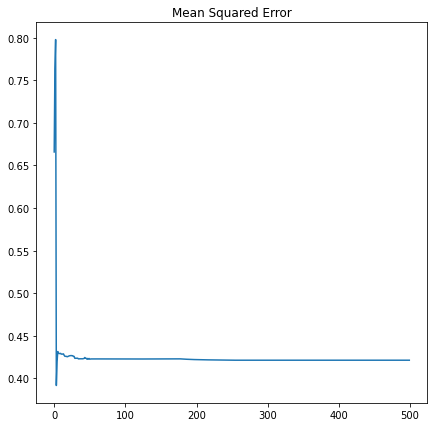

In [118]:
fig, axes = plt.subplots(figsize=(7,7))
monitoring_df.mean_squared_error.plot(title="Mean Squared Error")

**Function to predicte new data with updated weights:**

In [119]:
def prediction(test_data ,weights_h, weights_o):
  # feedforward
  #(412,10)                     (412, 8) (8, 10)
  hidden_layer = model.sigmoid(np.dot(test_data, weights_h))
  #(412,1)                      (412,10)     (10, 1)
  output_layer = model.sigmoid(np.dot(hidden_layer, weights_o))
  return output_layer

**Save weights to file:**

In [120]:
np.savetxt("weights_1.txt" , weights_1, delimiter=",")
np.savetxt("weights_2.txt" , weights_2 , delimiter=",")


**Load weights from file:**

In [121]:
w1 = np.loadtxt("weights_1.txt", delimiter=",")
w2 = np.loadtxt("weights_2.txt", delimiter=",").reshape((-1,1))

**Predict test data:**

In [123]:
output = prediction(test_x , w1 , w2)
mse3 = model.mean_squared_error(output, test_y)
mse3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.28107991307033336